In [1]:
import zipfile

with zipfile.ZipFile('widsdatathon2025.zip', 'r') as zip_ref:
    zip_ref.extractall('widsdatathon2025')

print("Files extracted successfully!")


Files extracted successfully!


In [9]:
import pandas as pd

# Function to load all data
def get_feats(mode='train'):
    mode = mode.upper()  # Ensure mode is always uppercase

    try:
        # Load quantitative metadata
        feats = pd.read_excel(f"widsdatathon2025/{mode}/{mode}_QUANTITATIVE_METADATA.xlsx")

        # Load categorical metadata with the correct filename depending on mode
        cate_file = f"{mode}_CATEGORICAL_METADATA.xlsx" if mode == 'TRAIN' else f"{mode}_CATEGORICAL.xlsx"
        cate = pd.read_excel(f"widsdatathon2025/{mode}/{cate_file}")

        # Merge categorical data
        feats = feats.merge(cate, on='participant_id', how='left')

        # Load functional connectome matrices
        func = pd.read_csv(f"widsdatathon2025/{mode}/{mode}_FUNCTIONAL_CONNECTOME_MATRICES.csv")
        feats = feats.merge(func, on='participant_id', how='left')

        # If training data, merge with solution file
        if mode == 'TRAIN':
            solution = pd.read_excel("widsdatathon2025/TRAIN/TRAINING_SOLUTIONS.xlsx")
            feats = feats.merge(solution, on='participant_id', how='left')

        return feats

    except FileNotFoundError as e:
        print(f"File not found: {e.filename}")
    except Exception as e:
        print(f"An error occurred: {str(e)}")


In [10]:
# Load data
train = get_feats(mode='TRAIN')
test = get_feats(mode='TEST')

In [11]:
train.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,...,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,...,-0.058396,-0.041544,0.142806,-0.006377,0.108005,0.148327,0.093230,-0.004984,1,1
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,...,-0.025624,-0.031863,0.162011,0.067439,0.017155,0.088893,0.064094,0.194381,1,0
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,...,0.010771,-0.044341,0.128386,0.047282,0.087678,0.146221,-0.009425,0.035150,1,0
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,...,-0.007152,0.032584,0.121726,0.045089,0.154464,0.106817,0.065336,0.234708,1,1
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,...,-0.010196,0.035638,0.074978,0.030579,0.025640,0.118199,0.112522,0.143666,1,1


In [14]:
print(train.shape)
print(train.columns)

(1213, 19930)
Index(['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems',
       ...
       '195throw_198thcolumn', '195throw_199thcolumn', '196throw_197thcolumn',
       '196throw_198thcolumn', '196throw_199thcolumn', '197throw_198thcolumn',
       '197throw_199thcolumn', '198throw_199thcolumn', 'ADHD_Outcome',
       'Sex_F'],
      dtype='object', length=19930)


In [15]:
train.isnull().sum().sort_values(ascending=False)

MRI_Track_Age_at_Scan               360
PreInt_Demos_Fam_Child_Ethnicity     11
participant_id                        0
84throw_119thcolumn                   0
84throw_118thcolumn                   0
                                   ... 
36throw_118thcolumn                   0
36throw_117thcolumn                   0
36throw_116thcolumn                   0
36throw_115thcolumn                   0
Sex_F                                 0
Length: 19930, dtype: int64

In [16]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1213 entries, 0 to 1212
Columns: 19930 entries, participant_id to Sex_F
dtypes: float64(19903), int64(26), object(1)
memory usage: 184.5+ MB


In [12]:
train.describe()

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,...,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn,ADHD_Outcome,Sex_F
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,...,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,58.876917,13.164880,3.781533,13.205276,39.374279,17.785655,16.393240,25.246496,2.059357,12.122836,...,-0.004378,0.001610,0.115171,0.049984,0.058144,0.093527,0.089403,0.128946,0.685078,0.342951
std,49.855501,2.780624,1.376700,3.811772,6.245928,3.764112,5.376994,3.950529,2.023322,6.577207,...,0.042900,0.047424,0.057128,0.051664,0.057674,0.054594,0.058036,0.058490,0.464676,0.474891
min,-100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.178688,-0.138048,-0.070094,-0.153540,-0.131455,-0.085566,-0.204160,-0.083077,0.000000,0.000000
25%,45.600000,14.000000,3.000000,11.000000,36.000000,16.000000,13.000000,23.000000,0.000000,7.000000,...,-0.033798,-0.030132,0.080291,0.015827,0.022316,0.059621,0.053224,0.090459,0.000000,0.000000
50%,76.670000,14.000000,3.000000,13.000000,40.000000,18.000000,16.000000,26.000000,2.000000,12.000000,...,-0.003724,0.000990,0.113640,0.052705,0.059151,0.093397,0.088612,0.127913,1.000000,0.000000
75%,93.400000,14.000000,4.000000,16.000000,43.000000,20.000000,19.000000,28.000000,3.000000,17.000000,...,0.024007,0.032268,0.150524,0.082526,0.095192,0.127144,0.127613,0.166523,1.000000,1.000000
max,100.000000,14.000000,12.000000,28.000000,50.000000,28.000000,37.000000,30.000000,10.000000,34.000000,...,0.180562,0.192015,0.375635,0.228748,0.322084,0.348153,0.267162,0.414304,1.000000,1.000000


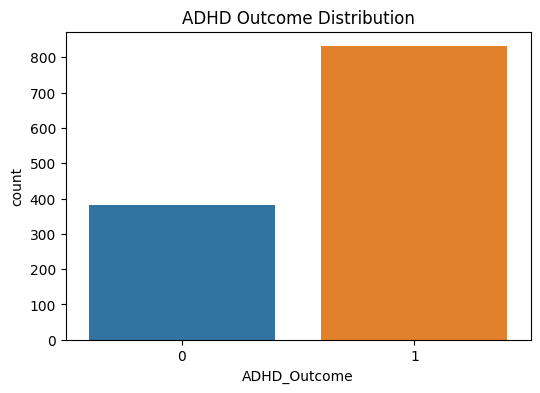

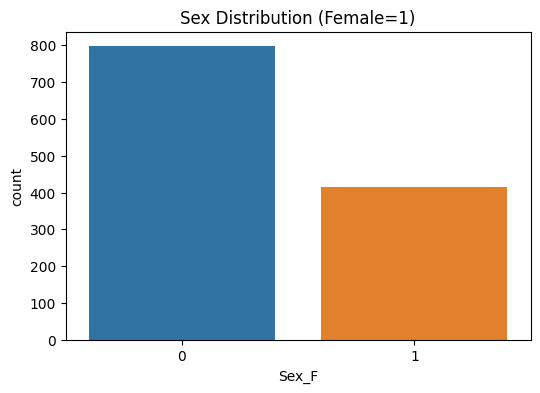

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='ADHD_Outcome', data=train)
plt.title('ADHD Outcome Distribution')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Sex_F', data=train)
plt.title('Sex Distribution (Female=1)')
plt.show()


In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()


C:\Users\qazal\AppData\Local\Temp\ipykernel_3912\1149622270.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), cmap='coolwarm', annot=False)


In [ ]:
sns.boxplot(x='ADHD_Outcome', y='some_numeric_feature', data=train)
plt.title('Feature Distribution by ADHD Outcome')
plt.show()

In [ ]:
adhd_female = train[(train['ADHD_Outcome'] == 1) & (train_data['Sex_F'] == 1)]
print(f"Number of Female ADHD cases: {len(adhd_female)}")